# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df_raw = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df_raw.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# Definindo flag_doente 0=saudável, 1=doente
df_raw['flag_doente'] = (df_raw['num'] != 0).astype('int64')

In [5]:
# Renomeando os valores 
df = df_raw
df.replace({'flag_doente': {0: 'saudável', 1: 'doente'}}, inplace=True)
df.replace({'sex': {1:'masculino', 0:'feminino'}}, inplace=True)
#Renomeando colunas
colunas_nomes = {'age': 'idade', 'sex': 'sexo', 'cp': 'tipo_dor_peito', 'trestbps': 'pressao_sanguínea_repouso',
           'chol': 'colesterol', 'fbs': 'acucar_sangue_jejum', 'restecg': 'resultados_eletrocardiograma',
           'thalach': 'freq_card_max', 'exang': 'angina_exercicio', 'oldpeak': 'depressao_st_exercicio',
           'slope': 'inclinacao_st_exercicio', 'ca': 'num_vasos_coloridos', 'thal': 'status_normal_defeito', 
           'num': 'diagnostico_doenca'}
df.rename(columns=colunas_nomes, inplace=True)

df.head()

,idade,sexo,tipo_dor_peito,pressao_sanguínea_repouso,colesterol,acucar_sangue_jejum,resultados_eletrocardiograma,freq_card_max,angina_exercicio,depressao_st_exercicio,inclinacao_st_exercicio,num_vasos_coloridos,status_normal_defeito,diagnostico_doenca,flag_doente
0,63.0,masculino,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,saudável
1,67.0,masculino,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,doente
2,67.0,masculino,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,doente
3,37.0,masculino,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,saudável
4,41.0,feminino,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,saudável


In [6]:
# Salvando os dados

df.to_csv('Heart_disease.csv', index=False)

1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [8]:
tab = pd.crosstab(df.sexo, df.flag_doente, margins=True, margins_name='total')
# Média doentes
tab['media_doente'] = tab['doente']/tab['total']
#Odds
tab['odds(saudável)'] = tab['saudável']/tab['doente']
# Odds ratio
tab['odds_ratio'] = tab['odds(saudável)']/tab.loc['total','odds(saudável)']
# Logito
tab['logito'] = np.log(tab['odds(saudável)'])
# Weight of evidence (WOE)
tab['woe'] = np.log(tab['odds_ratio'])
tab

flag_doente,doente,saudável,total,media_doente,odds(saudável),odds_ratio,logito,woe
sexo,,,,,,,,
feminino,25,72,97,0.257732,2.880000,2.440976,1.057790,0.892398
masculino,114,92,206,0.553398,0.807018,0.683997,-0.214410,-0.379802
total,139,164,303,0.458746,1.179856,1.000000,0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [10]:
idade = pd.cut(df.idade, bins=5)
idade.unique()

[(57.8, 67.4], (28.952, 38.6], (38.6, 48.2], (48.2, 57.8], (67.4, 77.0]]
Categories (5, interval[float64, right]): [(28.952, 38.6] < (38.6, 48.2] < (48.2, 57.8] < (57.8, 67.4] < (67.4, 77.0]]

In [11]:
# Adicionando as faixas de idade ao dataframe
df_modified = df.copy()
df_modified.idade = idade
df_modified.head(3)

,idade,sexo,tipo_dor_peito,pressao_sanguínea_repouso,colesterol,acucar_sangue_jejum,resultados_eletrocardiograma,freq_card_max,angina_exercicio,depressao_st_exercicio,inclinacao_st_exercicio,num_vasos_coloridos,status_normal_defeito,diagnostico_doenca,flag_doente
0,"(57.8, 67.4]",masculino,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,saudável
1,"(57.8, 67.4]",masculino,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,doente
2,"(57.8, 67.4]",masculino,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,doente


In [12]:
df_modified.idade.value_counts()

idade
(57.8, 67.4]      107
(48.2, 57.8]       97
(38.6, 48.2]       71
(67.4, 77.0]       17
(28.952, 38.6]     11
Name: count, dtype: int64

In [13]:
#Criando a tabela cruzada 
tab_idade = pd.crosstab(df_modified.idade, df_modified.flag_doente, margins=True, margins_name='total')
# Add quantidade média de doentes
tab_idade['media_doente'] = tab_idade['doente']/tab_idade['total']
# Add odds
tab_idade['odds'] = tab_idade['saudável']/tab_idade['doente']
# Odds ratio
tab_idade['odds_ratio'] = tab_idade['odds']/tab_idade.loc['total', 'odds']
# Logito
tab_idade['logito'] = np.log(tab_idade['odds'])
# O "Weight of Evidence (WOE)"
tab_idade['woe'] = np.log(tab_idade['odds_ratio'])
tab_idade

flag_doente,doente,saudável,total,media_doente,odds,odds_ratio,logito,woe
idade,,,,,,,,
"(28.952, 38.6]",3,8,11,0.272727,2.666667,2.260163,0.980829,0.815437
"(38.6, 48.2]",21,50,71,0.295775,2.380952,2.018002,0.867501,0.702108
"(48.2, 57.8]",41,56,97,0.422680,1.365854,1.157644,0.311780,0.146387
"(57.8, 67.4]",67,40,107,0.626168,0.597015,0.506007,-0.515813,-0.681206
"(67.4, 77.0]",7,10,17,0.411765,1.428571,1.210801,0.356675,0.191282
total,139,164,303,0.458746,1.179856,1.000000,0.165392,0.000000


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

In [15]:
sns.set_theme(style='darkgrid')

### Gráficos - tabela Sexo x flag_doente

In [17]:
tab

flag_doente,doente,saudável,total,media_doente,odds(saudável),odds_ratio,logito,woe
sexo,,,,,,,,
feminino,25,72,97,0.257732,2.880000,2.440976,1.057790,0.892398
masculino,114,92,206,0.553398,0.807018,0.683997,-0.214410,-0.379802
total,139,164,303,0.458746,1.179856,1.000000,0.165392,0.000000


<Axes: title={'center': 'Chance de ficar saudável por sexo'}, xlabel='sexo', ylabel='Chance de estar saudável'>

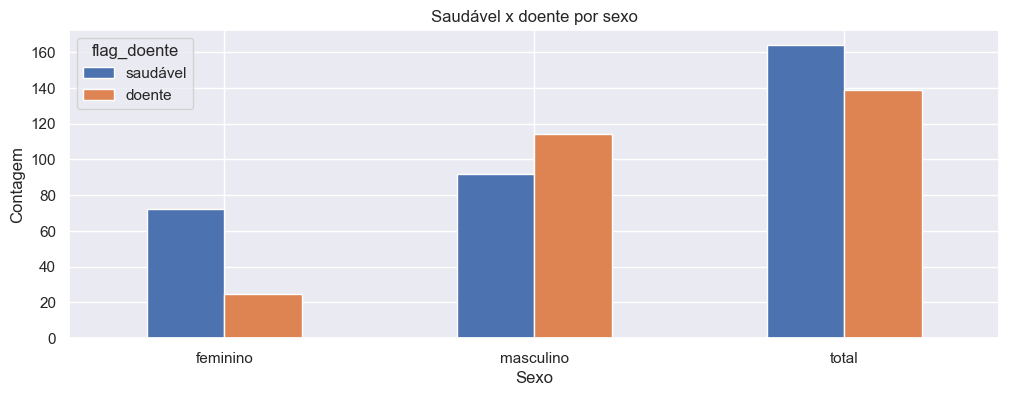

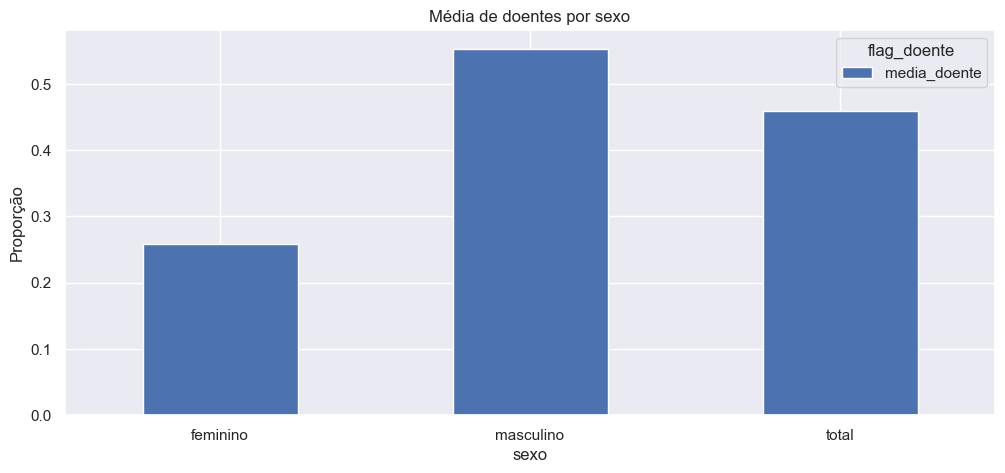

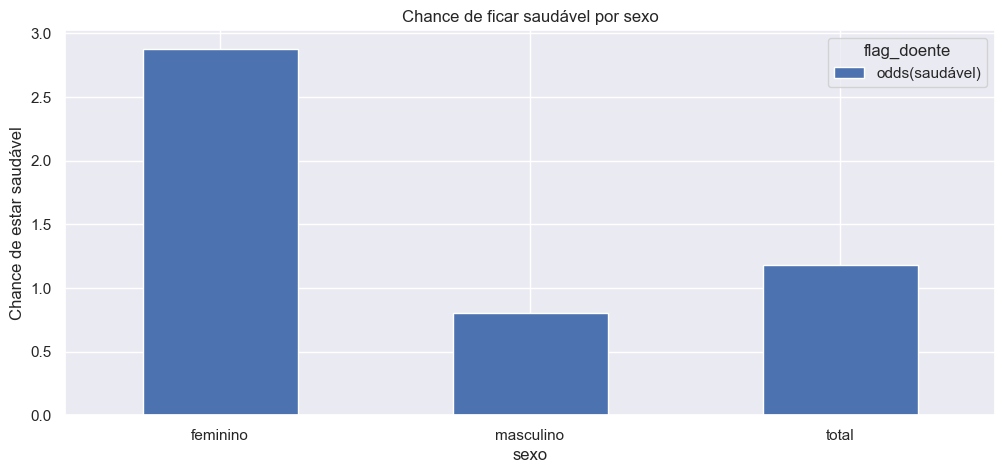

In [18]:
# Gráficos de barra para 
# saudável x doente
tab[['saudável', 'doente']].plot.bar(title='Saudável x doente por sexo', xlabel='Sexo', 
                                     ylabel='Contagem', rot=0, figsize=[12,4])

# média de doentes
tab[['media_doente']].plot.bar(title='Média de doentes por sexo', xlabel='sexo',
                                     ylabel="Proporção", rot=0, figsize=[12,5])

# odds
tab[['odds(saudável)']].plot.bar(title='Chance de ficar saudável por sexo', xlabel='sexo',
                                     ylabel="Chance de estar saudável", rot=0, figsize=[12,5])


### Gráficos - tabela idade x flag_doente

In [20]:
tab_idade

flag_doente,doente,saudável,total,media_doente,odds,odds_ratio,logito,woe
idade,,,,,,,,
"(28.952, 38.6]",3,8,11,0.272727,2.666667,2.260163,0.980829,0.815437
"(38.6, 48.2]",21,50,71,0.295775,2.380952,2.018002,0.867501,0.702108
"(48.2, 57.8]",41,56,97,0.422680,1.365854,1.157644,0.311780,0.146387
"(57.8, 67.4]",67,40,107,0.626168,0.597015,0.506007,-0.515813,-0.681206
"(67.4, 77.0]",7,10,17,0.411765,1.428571,1.210801,0.356675,0.191282
total,139,164,303,0.458746,1.179856,1.000000,0.165392,0.000000


<Axes: title={'center': 'Chance de estar saudável por faixa etária'}, xlabel='Faixa etária', ylabel='Chance de estar saudável'>

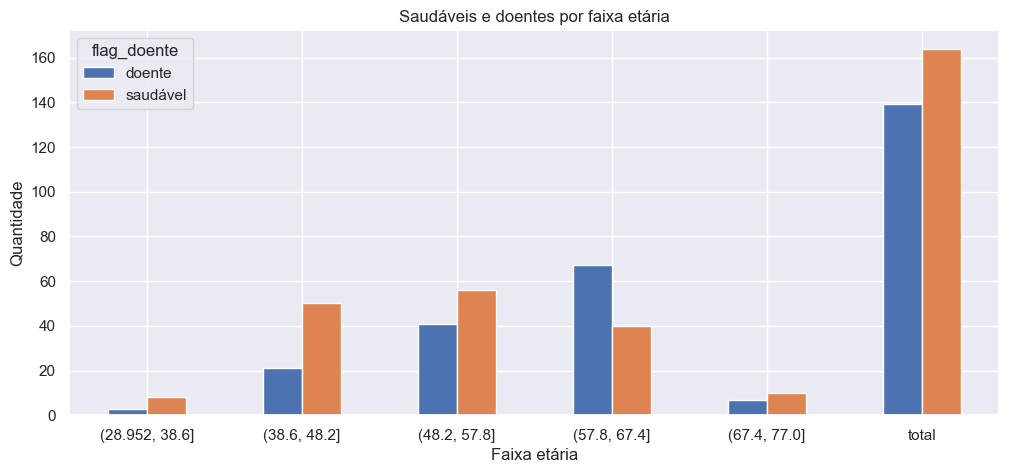

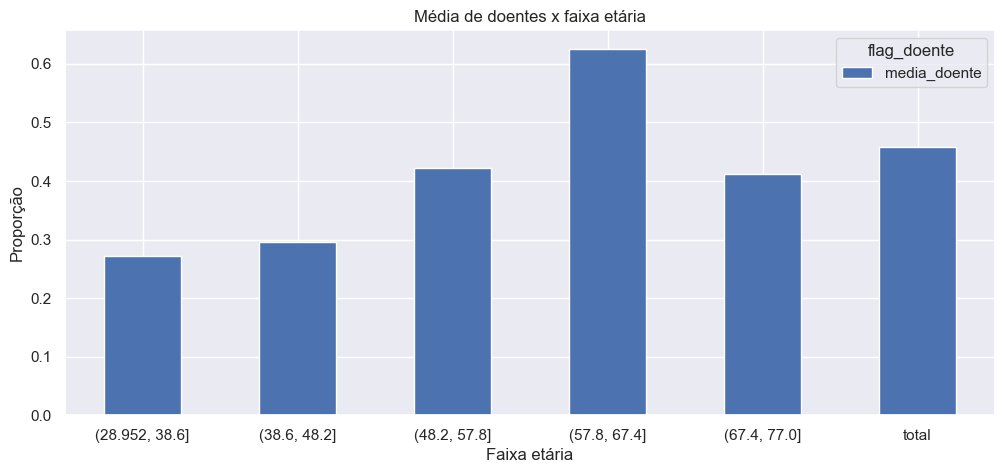

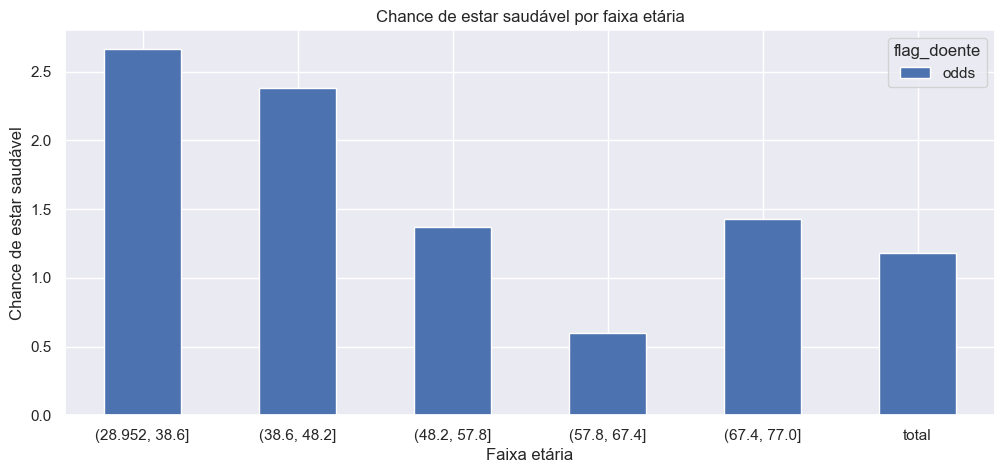

In [21]:
# Usando gráficos de barra 
tab_idade[['doente', 'saudável']].plot.bar(title='Saudáveis e doentes por faixa etária', xlabel='Faixa etária',
                                          ylabel='Quantidade', rot=0, figsize=[12,5])

tab_idade[['media_doente']].plot.bar(title='Média de doentes x faixa etária', xlabel='Faixa etária',
                                    ylabel='Proporção', rot=0, figsize=[12,5])

tab_idade[['odds']].plot.bar(title='Chance de estar saudável por faixa etária', xlabel='Faixa etária',
                            ylabel='Chance de estar saudável', rot=0, figsize=[12,5])